<a href="https://colab.research.google.com/github/ujeongmin/ESAA/blob/main/ESAA_HW_3_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## [4. 모델 훈련]
### 4.1 선형 회귀
일반적으로 선형 모델은 입력 특성의 가중치 합과 편향(bias) 또는 절편이라는 상수를 더해 예측을 만듬

#### 4.1.1 정규 방정식
비용 함수를 최소화하는 θ값을 찾기위한 해석적인 방법 - 정규방정식  

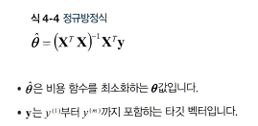

In [ ]:
import numpy as np

X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)

* 정규방정식을 사용해 θhat 계산 - inv() 함수로 역행렬 계산, dot() 메서드로 행렬 곱셈

In [ ]:
X_b = np.c_[np.ones((100,1)),X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [ ]:
theta_best

array([[4.10515485],
       [2.94284393]])

* 위는 잡음 때문에 원래 함수의 파라미터를 정확하게 재현하지 못함, θhat을 사용해 예측

In [ ]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.10515485],
       [9.99084271]])

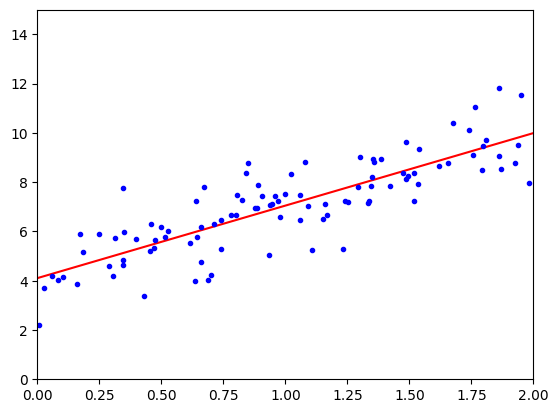

In [ ]:
import matplotlib.pyplot as plt
plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')
plt.axis([0,2,0,15])
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
print(lin_reg.intercept_, lin_reg.coef_)
lin_reg.predict(X_new)

[4.10515485] [[2.94284393]]


array([[4.10515485],
       [9.99084271]])

* LinearRegression 클래스는 scipy.linalg.lstsq() 함수를 기반으로 함

In [ ]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.10515485],
       [2.94284393]])

* np.linalg.pinv() 함수를 사용해 유사역행렬 직접 구할 수 있음

In [ ]:
np.linalg.pinv(X_b).dot(y)

array([[4.10515485],
       [2.94284393]])

#### 4.1.2 계산 복잡도
역행렬을 계산하는 계산 복잡도는 일반적으로 O(n^2.4)~O(n^3) 사이, 사이킷런의 LR 클래스가 사용하는 SVD 방법은 약 O(n^2)

### 4.2 경사 하강법
여러 종류의 문제에서 최적의 해법을 찾을 수 있는 최적화 알고리즘 - 비용 함수를 최소화하기 위해 반복해서 파라미터를 조정해감  
가장 중요한 파라미터는 스텝의 크기로, 학습률 하이퍼파라미터로 결정됨

#### 4.2.1 배치 경사 하강법
편도함수 - 각 모델 파라미터 θj에 대해 비용함수의 크레이디언트를 계산해야 함, 즉 θj가 조금 변경될 때 비용 함수가 얼마나 바뀌는지 계산해야 함  
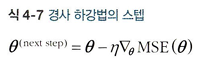  
* 위 알고리즘을 간단히 구현해봄 (정규방정식으로 찾은 것과 정확히 일치)

In [ ]:
eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)

for iteration in range(n_iterations):
  gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
  theta = theta - eta * gradients

theta

array([[4.10515485],
       [2.94284393]])

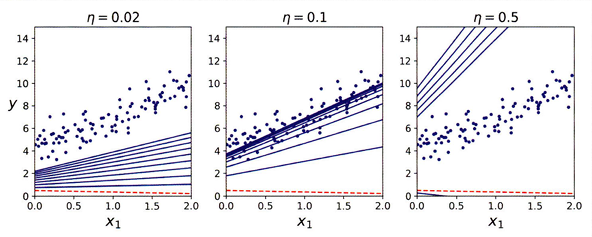  
* 1은 학습률 너무 낮음, 2는 적당, 3은 학습률이 너무 높음

#### 4.2.2 확률적 경사 하강법
배치 경사 하강법의 가장 큰 문제는 훈련 세트가 커지면 매우 느려지게 됨, 반대로 확률적 경사 하강법은 훨씬 빠름  
매 반복에서 학습률을 결정하는 함수를 학습 스케줄이라고 부름

In [ ]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
  return t0 / (t + t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
  for i in range(m):
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
    eta = learning_schedule(epoch * m + i)
    theta = theta - eta * gradients

theta

array([[4.06114196],
       [2.99024062]])

* 한 반복에서 m번 되풀이 되고, 이때 각 반복을 에포크 라고 함
* 아래는 SGD 방식으로 선형 회귀 사용

In [ ]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

print(sgd_reg.intercept_, sgd_reg.coef_)

[4.10746936] [2.9387201]


#### 4.2.3 미니배치 경사 하강법
미니배치라 부르는 임의의 작은 샘플 세트에 대해 그레이디언트를 계산  
* 최솟값 도달 경로  

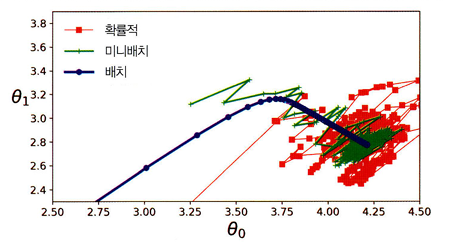  
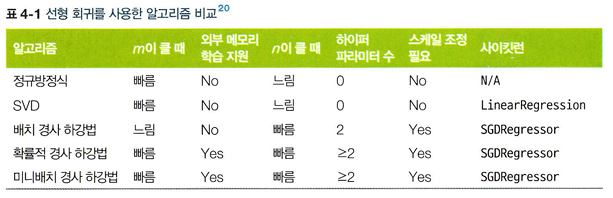

### 4.3 다항 회귀
각 특성의 거듭제곱을 새로운 특성으로 추가하고, 이 확장된 특성을 포함한 데이터셋에 선형 모델을 훈련시킴

In [ ]:
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

* PolynomialFeatures를 사용해 훈련 데이터에 새로운 특성 추가

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print(X[0])
X_poly[0]

[1.2700795]


array([1.2700795 , 1.61310193])

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
print(lin_reg.intercept_, lin_reg.coef_)

[1.95648452] [[0.97795859 0.4655159 ]]


* PolynomialFeatures가 주어진 차수까지 특성 간의 모든 교차항을 추가하기 때문에, 여러 특성 사이의 관계를 찾을 수 있음 (일반적인 선형 회귀 모델에서는 하지 못함)

### 4.4 학습 곡선
훈련 세트와 검증 세트의 모델 성능을 훈련 세트 크기(또는 훈련 반복)의 함수로 나타냄


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
  train_errors, val_errors = [], []
  for m in range(1, len(X_train)):
    model.fit(X_train[:m], y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_val)
    train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))
  plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='훈련 세트')
  plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label='검증 세트')

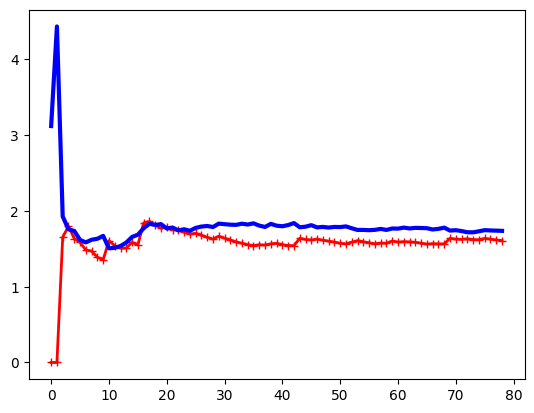

In [ ]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

* 과소적합된 모델임 - 두 곡선이 수평한 구간을 만들고 꽤 높은 오차에서 매우 가까이 근접해 있음, 과소적합되어 있다면 훈련 샘플을 추가해도 효과가 없으므로 더 복잡한 모델을 사용하거나 더 나은 특성을 선택해야 함
* 같은 데이터에서 10차 다항 회귀 모델의 학습 곡선을 그려봄

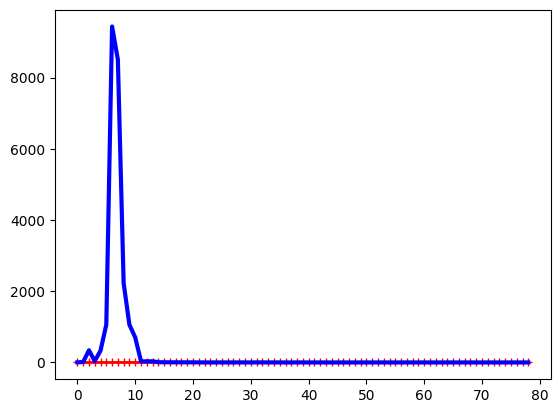

In [ ]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
    ('lin_reg', LinearRegression())
    ])

plot_learning_curves(polynomial_regression, X, y)

* 중요한 차이점  
1) 훈련 데이터의 오차가 선형 회귀 모델보다 훨씬 낮음  
2) 과대적합 모델 - 두 곡선 사이에 공간이 있다는 것은 훈련 데이터에서의 모델 성능이 검증 데이터에서보다 훨씬 낫다는 뜻, 더 큰 훈련 세트를 사용하면 두 곡선이 점점 가까워져 모델 개선됨

### 4.5 규제가 있는 선형 모델
과대적합을 감소시키는 좋은 방법은 모델을 규제하여 자유도를 줄이는 것  
다항 회귀 모델을 규제하는 간단한 방법은 다항식의 차수를 감소시키는 것  
선형 회귀 모델은 모델의 가중치를 제한함으로써 규제(릿지, 라쏘, 엘라스틱넷)


#### 4.5.1 릿지 회귀
l2 노름의 제곱을 2로 나눈 것 사용  
규제항이 훈련하는 동안에만 비용 함수에 추가됨  
모델의 훈련이 끝나면 모델이 성능을 규제가 없는 성능 지표로 평가

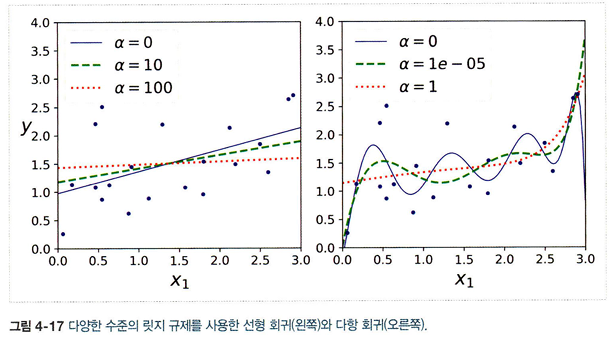

* 다음은 정규방정식을 사용한 릿지 회귀를 적용

In [ ]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[4.80897147]])

* 다음은 확률적 경사 하강법(penalty=l2가 릿지 회귀)

In [ ]:
sgd_reg = SGDRegressor(penalty='l2')
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.78514138])

#### 4.5.2 라쏘 회귀
가중치 벡터의 l1 노름을 사용  

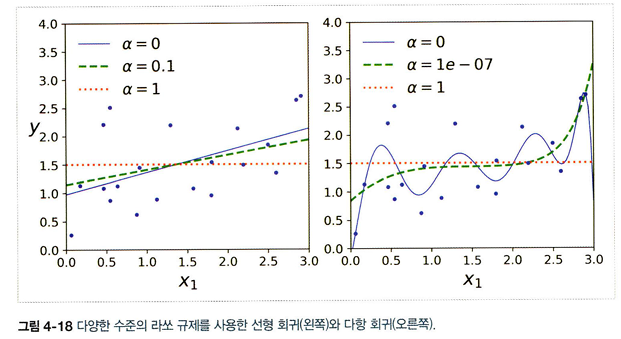

In [ ]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([4.76727983])

* SGDRegressor(penalty='l1')가 라쏘 회귀  


#### 4.5.3 엘라스틱넷
규제항을 릿지와 회귀의 규제항을 단순히 더해서 사용, 혼잡 비율 r을 사용해 조절 (r=0이면 릿지, r=1이면 라쏘)  
* l1_ratio 파라미터

In [ ]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([4.76968861])

#### 4.5.4 조기 종료
검증 에러가 최솟값에 도달하면 바로 훈련을 중지시킴  
감소하던 검증 에러가 멈추었다가 다시 상승하는데, 모델이 훈련 데이터에 과대적합되기 시작하는 것이기 때문에 즉시 훈련 멈춤
* 다음은 조기 종료를 위한 기본적인 구현 코드

In [ ]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

poly_scaler = Pipeline([
    ('poly_features', PolynomialFeatures(degree=90, include_bias=False)),
    ('std_scaler', StandardScaler)
    ])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate='constant', eta=0.0005)

minimum_val_error = float('inf')
best_epoch = None
best_model = None
for epoch in range(1000):
  sgd_reg.fit(X_train_poly_scaled, y_train)
  y_val_predict = sgd_reg.predict(X_val_poly_scaled)
  val_error = mean_squared_error(y_val, y_val_predict)
  if val_error < minimum_val_error:
    minimum_val_error = val_error
    best_epoch = epoch
    best_model = clone(sgd_reg)

* warm_start=True로 지정하면 fit() 메서드가 호출될 때 처음부터 다시 시작하지 않고 이전 모델 파라미터에서 훈련 이어감

### 4.6 로지스틱 회귀

#### 4.6.1 확률 추정
선형 회귀처럼 바로 결과를 출력하지 않고 결괏값의 로지스틱을 출력  
로지스틱은 0과 1 사이의 값을 출력하는 시그모이드 함수

#### 4.6.2 훈련과 비용 함수
훈련의 목적은 양성 샘플에 대해서는 높은 확률을 추정하고 음성 샘플에 대해서는 낮은 확률을 추정하는 모델의 파라미터 벡터 θ를 찾는 것

#### 4.6.3 결정 경계



In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
print(list(iris.keys()))
X = iris['data'][:,3:]
y = (iris['target']==2).astype(int)

['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']


In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

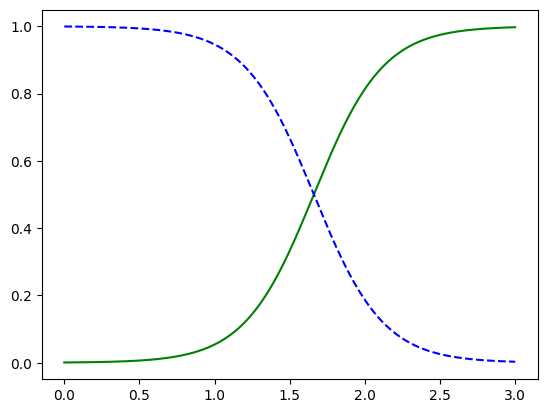

In [ ]:
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:,1], 'g-', label='Iris virginica')
plt.plot(X_new, y_proba[:,0], 'b--', label='Not Iris virginica')

* 양쪽의 확률이 똑가이 50%가 되는 1.6cm 근방에서 결정 경계가 만들어짐 (1.6cm보다 크면 분류기는 Iris verginica로 분류, 작으면 아니라고 예측할 것)

In [ ]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

#### 4.6.4 소프트맥스 회귀
여러 개의 이진 분류기를 훈련시켜 연결하지 않고 직접 다중 클래스를 지원하도록 일반화될 수 있음(소프트맥스 회귀 또는 다항 로지스틱 회귀라고 함)
* multi_class='multinomial'로 소프트맥스 회귀 사용 가능
* solver 매개변수에 'lbfgs'와 같이 소프트맥스 회귀를 지원하는 알고리즘을 지정해야 함

In [ ]:
X = iris['data'][:,(2,3)]
y = iris['target']

softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)
softmax_reg.fit(X,y)

LogisticRegression(C=10, multi_class='multinomial')

In [ ]:
print(softmax_reg.predict([[5,2]]))
softmax_reg.predict_proba([[5,2]])

[2]


array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])